# ランダムフォレストを元にAgeの欠損を埋める

In [7]:
import pandas as pd
import pipeline
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importlib.reload(pipeline)
from pipeline.baseline import Baseline

In [8]:
df_titanic_train = pd.read_csv("../../data/train.csv")

/Users/yuramaru/.local/share/virtualenvs/kaggle-practice-0C9Qxkwh/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/yuramaru/.local/share/virtualenvs/kaggle-practice-0C9Qxkwh/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


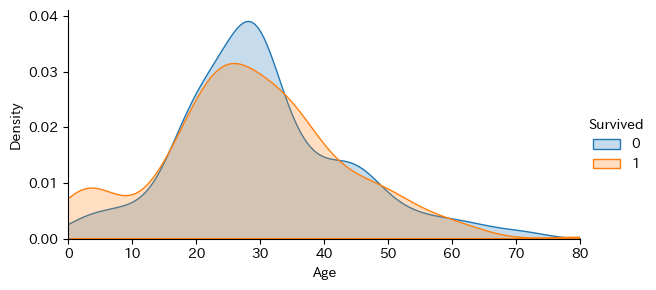

In [9]:
# ------------ Age ------------
# Age を Pclass, Sex, Parch, SibSp からランダムフォレストで推定
from sklearn.ensemble import RandomForestRegressor

df = df_titanic_train.copy()

# 推定に使用する項目を指定
age_df = df[["Age", "Pclass", "Sex", "Parch", "SibSp"]]

# ラベル特徴量をワンホットエンコーディング
age_df = pd.get_dummies(age_df)

# 学習データとテストデータに分離し、numpyに変換
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values

# 学習データをX, yに分離
X = known_age[:, 1:]
y = known_age[:, 0]

# ランダムフォレストで推定モデルを構築
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

# 推定モデルを使って、テストデータのAgeを予測し、補完
predictedAges = rfr.predict(unknown_age[:, 1::])
df.loc[(df.Age.isnull()), "Age"] = predictedAges

# 年齢別生存曲線と死亡曲線
facet = sns.FacetGrid(df[0:890], hue="Survived", aspect=2)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df.loc[0:890, "Age"].max()))
facet.add_legend()
plt.show()

In [11]:
X, y, id = (
    df[["Age", "Pclass", "Fare"]],
    df["Survived"],
    df["PassengerId"],
)

bl = Baseline(input_X=X, input_y=y, input_id=id)

impls, scores = bl.create_model()

print(scores)
print(impls)

0.6858012679681125
   feature  importance
0   Pclass          98
1     Fare        2327
2  Age_bin         565
